In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import pandas as pd
import random
np.random.seed(0)

In [2]:
# Clone the traffic size data
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [3]:
# Get the data
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [4]:
# Unpickle the data
import pickle
# Open file in binary read as f
with open(file='german-traffic-signs/train.p', mode='rb') as f:
  # Load training data
  train_data = pickle.load(f)

# Open file in binary read as f
with open(file='german-traffic-signs/valid.p', mode='rb') as f:
  # Load validation data
  valid_data = pickle.load(f)

# Open file in binary read as f
with open(file='german-traffic-signs/test.p', mode='rb') as f:
  # Load validation data
  test_data = pickle.load(f)

# Get training, validation, and testing data
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = valid_data['features'], valid_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [5]:
X_train.shape
y_train.shape

(34799,)

In [6]:
# Verify data was imported correctly by ensuring there is the same number of images as labels
assert(X_train.shape[0] == y_train.shape[0]), 'The number of images is not equal to the number of labels'
assert(X_val.shape[0] == y_val.shape[0]), 'The number of images is not equal to the number of labels'
assert(X_test.shape[0] == y_test.shape[0]), 'The number of images is not equal to the number of labels'

# Verify the data was imported correctly by ensuring the dimensions are 32x32x3
assert(X_train.shape[1:] == (32, 32, 3)), 'The dimensions of the images are not 32 x 32 x 3'
assert(X_val.shape[1:] == (32, 32, 3)), 'The dimensions of the images are not 32 x 32 x 3'
assert(X_test.shape[1:] == (32, 32, 3)), 'The dimensions of the images are not 32 x 32 x 3'

In [7]:
# Read signnames csv file
data = pd.read_csv('german-traffic-signs/signnames.csv')

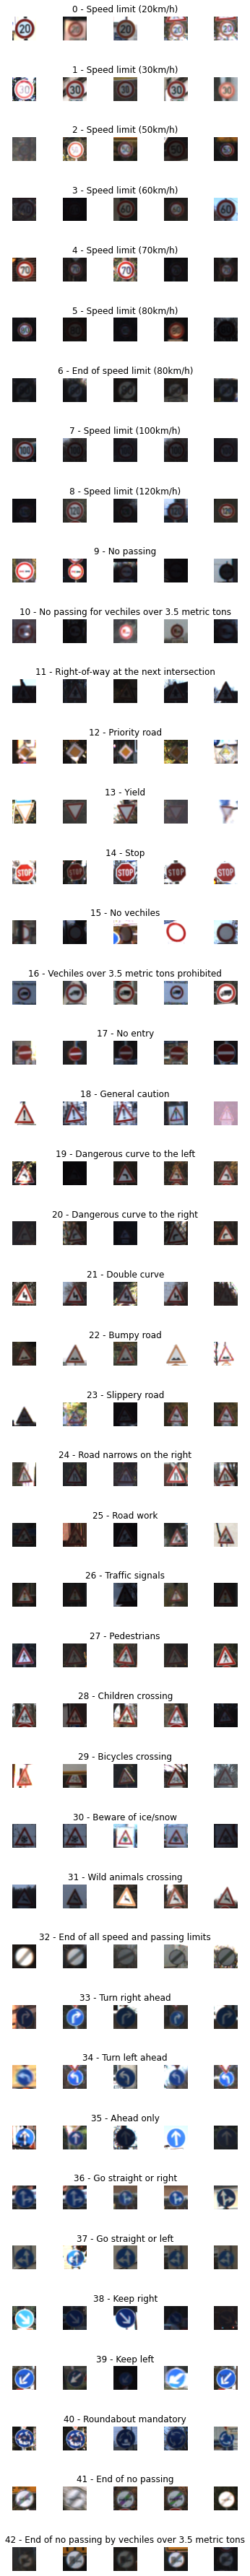

In [8]:
num_of_samples=[]

# Get five columns and 43 classes
cols = 5
num_classes = 43

# Get 43 plots with 5 columns each
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

# For each column
for i in range(cols):
  # Iterate over data by (index, series). So this iterates over all rows and gets the index and signname for each row
  for j, row in data.iterrows():
    # Get the rows in the training data that match the signname
    x_selected = X_train[y_train == j]
    # Show the image
    axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    # Put the title underneath the 3rd column
    if i == 2:
      axs[j][i].set_title(str(j) + " - " + row["SignName"])
      # Append the number of samples that match the given signname
      num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


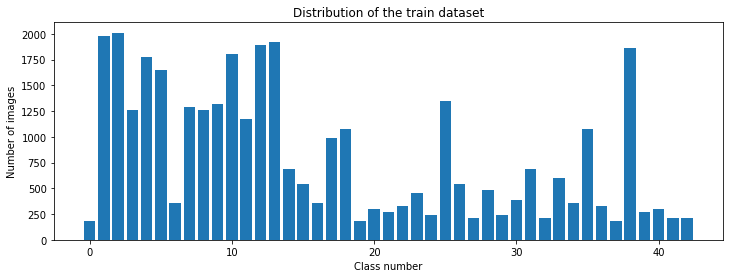

In [9]:
print(num_of_samples)
# Get the distribution of the number of samples for each label
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [10]:
import cv2

(32, 32, 3)
36


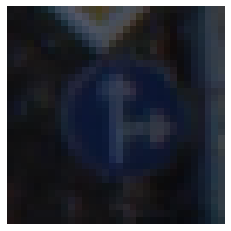

In [11]:
plt.imshow(X_train[1000])
plt.axis('off')
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


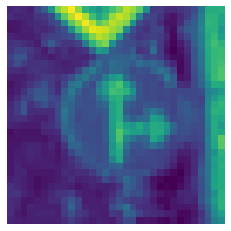

In [12]:
# Convert the image to grayscale since the color is not the most important image
# It allows our network to be more efficient since it only has a depth of 1
def grayscale(img):
  # Convert to grayscale
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

# Plot the grayscale of image
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis('off')

# Print the shape to ensure the image has been grayscaled
print(img.shape)

(32, 32)


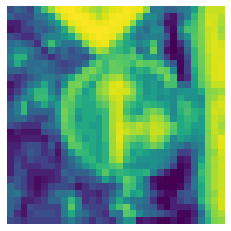

In [13]:
# Use Histogram Equalization which seeks to normalize the lighting in all images
# It does so by spreading out brightness across a wider range of values. "Flattens histogram", makes them more uniform

# This enhances any contrasts in a grayscale image by spreading them throughout image

def equalize(img):
  # Use Histogram Equalization to equalizes our grayscale image. Only accepts grayscale images
  img = cv2.equalizeHist(img)
  return img

# Equalize our image
img = equalize(img)

# Plot equalized image
plt.imshow(img)
plt.axis('off')
print(img.shape)



In [14]:
# Apply functions to all images
def preprocessing(img):
  # Grayscale and apply histogram equalization to our image
  img = grayscale(img)
  img = equalize(img)
  # Normalize pixel intensities by dividing by 255 (values between 0 and 1)
  img = img / 255
  return img

# Apply preprocessing function to every value in training data and store as numpy array
X_train = np.array(list(map(preprocessing, X_train)))

# Apply preprocessing function to every value in validation data and store as numpy array
X_val = np.array(list(map(preprocessing, X_val)))

# Apply preprocessing function to every value in test data and store as numpy array
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


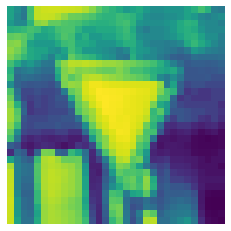

In [15]:
# Plot random image to ensure images are preprocessed
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [16]:
# Reshape our images to ensure they have a depth of 1
X_train = X_train.reshape((34799, 32, 32, 1))
X_test = X_test.reshape((12630, 32, 32, 1))
X_val = X_val.reshape((4410, 32, 32, 1))

In [17]:
# Image Augmentation to allow model to train on augmented training images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# width_shift_range = maximum horizontal shift by specified value
# height_shift_range = maximum vertical shift by specified value
# zoom_range = zoom value (maximum zoom out = 0.8; maximum zoom in = 1.2)
# shear_range = 
# rotation_range = rotates image by degree value
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
# Fit to training data
datagen.fit(X_train)

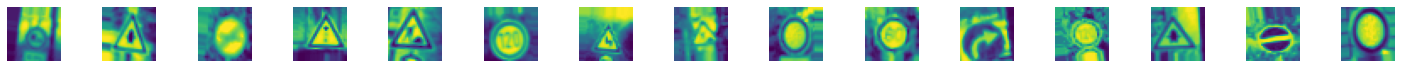

In [18]:
# Create new images from image generator
batches = datagen.flow(X_train, y_train, batch_size=20)

# Plot new images
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

# For each column
for i in range(15):
  # Show reshapped image
  axs[i].imshow(X_batch[i].reshape(32, 32))
  axs[i].axis('off')

In [28]:
# Get augmented training data
augmented_xlist = []
augmented_ylist = []
for i in range(2000):
  # Create new images from image generator
  batches = datagen.flow(X_train, y_train, batch_size=50)

  # Plot new images
  X_batch, y_batch = next(batches)

  for i in range(len(X_batch)):
    augmented_xlist.append(X_batch[i])
    augmented_ylist.append(y_batch[i])

X_train_aug = np.array(augmented_xlist)
y_train_aug = np.array(augmented_ylist)

In [19]:
# One hot encoded our labels into a vector
y_train = to_categorical(y_train, num_classes=43)
y_val = to_categorical(y_val, num_classes=43)
y_test = to_categorical(y_test, num_classes=43)

In [20]:
def cnn_model():
  model = Sequential()
  # Add Convolutional Layer (64 x 5 x 5 + 64 parameters)
  model.add(Conv2D(filters=64, kernel_size=5, input_shape=(32, 32, 1), activation='relu', strides=(1,1)))
  # Add Convolutional Layer (64 x 5 x 5 x 30 + 64 parameters)
  model.add(Conv2D(filters=64, kernel_size=5, activation='relu', strides=(1,1)))
  # Add Pooling Layer
  model.add(MaxPooling2D(pool_size=(2,2)))

  # Add Convolutional Layer (32 x 3 x 3 x 30 + 32 parameters)
  model.add(Conv2D(filters=32, kernel_size=3, activation='relu', strides=(1,1)))
  # Add Convolutional Layer (32 x 3 x 3 x 30 + 32 parameters)
  model.add(Conv2D(filters=32, kernel_size=3, activation='relu', strides=(1,1)))
  # Add Pooling Layer
  model.add(MaxPooling2D(pool_size=(2,2)))

  # Add Dropout Layer to randomly drop 50% of nodes
  #model.add(Dropout(rate=0.5))

  # Flatten into one dimensional vector
  model.add(Flatten())

  # Feed flatten layer into fully connected layer
  model.add(Dense(units=500, activation='relu'))
  # Add Dropout Layer to randomly drop 50% of nodes
  model.add(Dropout(rate=0.5))
  # Add Fully connected output layer
  model.add(Dense(units=num_classes, activation='softmax'))


  # Compile model with Adam optimizer
  model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  return model


In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
model = cnn_model()
callbacks = EarlyStopping(monitor='val_loss', patience=2)

In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [24]:
# Fit model to training with generated imagesdata
history = model.fit(datagen.flow(X_train, y_train, batch_size=50), 
                    steps_per_epoch=len(X_train) / 50,
                    epochs = 10, 
                    validation_data=(X_val, y_val), validation_steps=len(X_val) / 50,
                    callbacks=[callbacks], shuffle=1)

Epoch 1/10
696/695 [==============================] - 12s 17ms/step - loss: 1.7674 - accuracy: 0.4990 - val_loss: 0.3086 - val_accuracy: 0.9059
Epoch 2/10
696/695 [==============================] - 11s 16ms/step - loss: 0.5817 - accuracy: 0.8209 - val_loss: 0.1333 - val_accuracy: 0.9574
Epoch 3/10
696/695 [==============================] - 11s 16ms/step - loss: 0.3695 - accuracy: 0.8872 - val_loss: 0.1251 - val_accuracy: 0.9646
Epoch 4/10
696/695 [==============================] - 11s 16ms/step - loss: 0.2749 - accuracy: 0.9164 - val_loss: 0.0662 - val_accuracy: 0.9800
Epoch 5/10
696/695 [==============================] - 11s 16ms/step - loss: 0.2339 - accuracy: 0.9290 - val_loss: 0.0498 - val_accuracy: 0.9853
Epoch 6/10
696/695 [==============================] - 11s 16ms/step - loss: 0.1945 - accuracy: 0.9398 - val_loss: 0.0515 - val_accuracy: 0.9857
Epoch 7/10
696/695 [==============================] - 11s 16ms/step - loss: 0.1740 - accuracy: 0.9465 - val_loss: 0.0438 - val_accuracy:

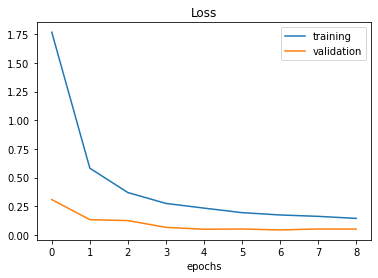

In [25]:
# Plot the loss data
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epochs');

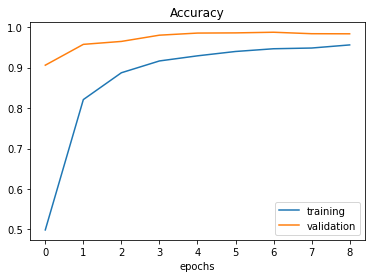

In [26]:
# Plot the accuracy data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epochs');

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Score: {score[0]}')
print(f'Test Accuracy: {score[1]}')

Test Score: 0.14716587960720062
Test Accuracy: 0.9593032598495483


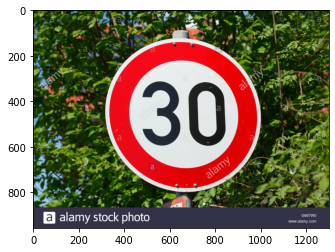

In [28]:
# Testing the model

import requests
from PIL import Image
# Get image url
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
# Send a request to the url
r = requests.get(url, stream=True)
# Open the request to get the image
img = Image.open(r.raw)
# Show the image
plt.imshow(img, cmap=plt.get_cmap('gray'));

(32, 32)
Predicted sign: [1]


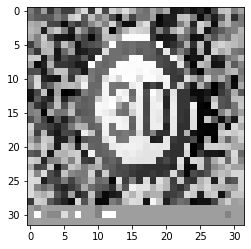

In [29]:
# Convert image to numpy array to match format
img = np.asarray(img)
# Resize to 32 x 32 to match format
img = cv2.resize(img, (32, 32))
# Apply preprocessing
img = preprocessing(img)

# Plot preprocessed image
plt.imshow(img, cmap=plt.get_cmap('gray'))
# Pring shape of image
print(img.shape)

# Reshape the image to get it to match format of model
img = img.reshape((1, 32, 32, 1))

# Predict the image
print(f'Predicted sign: {str(np.argmax(model.predict(img), axis=-1))}')
